# Least square fitting

In [114]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

This chapter is on the concept of least-square fitting of data.  The assumption that we are making here is that each data point that we are measuring is independent of each other and that each data point $y_{i}=f(x_{i},\theta)$ has an error that has been drawn from a normal distribution with zero mean and standard deviation $\sigma_{i}$. $\theta$ represents the parameters of the model $f(x,\theta)$ with which you want to fit the data.

Lets find out what we can say about the likelihood pdf of such data:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \prod_{i}\frac{1}{\sqrt{2\pi\sigma^2}}\exp\big(-\frac{(y_{i}(x_{i})-f(x_{i},\theta))^2}{2\sigma_{i}^2}\big)$$

Least-square fits are often also called $\chi^2$ fits.  $\chi^2$ is defined as:

$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

which simplifies the likelihood to:

$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

now lets assume also that the prior distribution for your parameters are flat $P(\theta)=const$.  Then

$$P(\theta \mid \{y_{i}(x_{i})\}) \propto P (\{y_{i}(x_{i})\}\mid \theta)$$

and if you are only interested in the maximum value of the $P(\theta \mid \{y_{i}(x_{i})\})$ then you need to find the minimum value of $\chi^2$.  That is what people mean when they talk about least-square fitting: minimizing $\chi^2$ as a function of $\theta$.


## simple fit to a line

In [115]:
x = np.linspace(-5,5,11)
print(x)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [116]:
y = 2*x + np.random.normal(0,1,11)

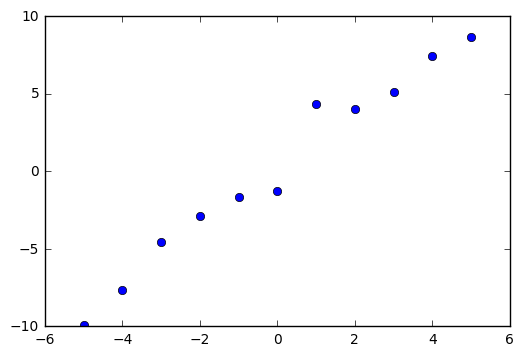

In [117]:
plt.plot(x,y,"o")

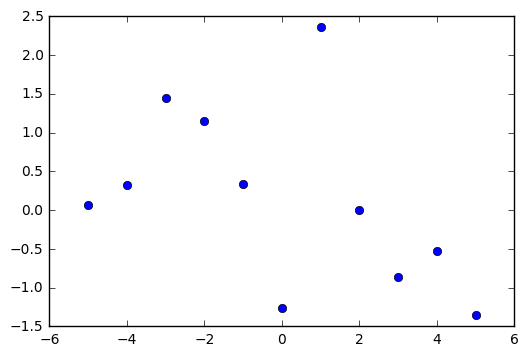

In [118]:
res = y -2*x
plt.plot(x,res,"o")

In [119]:
# np.polyfit is a function that least-square fits a polynomical to data
p = np.polyfit(x,y,1)
print(p)

[ 1.83921532  0.1536567 ]


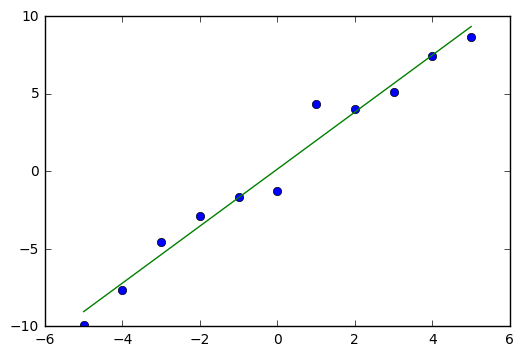

In [120]:
yfit = p[1]+p[0]*x
plt.plot(x,y,"o")
plt.plot(x,yfit)

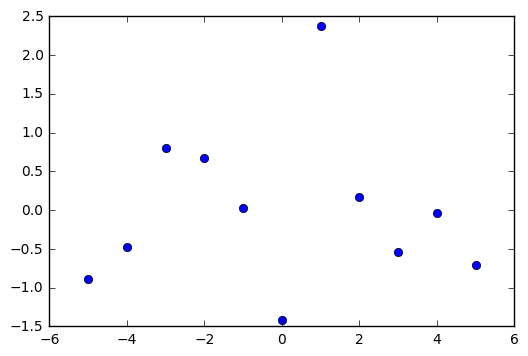

In [121]:
res = y - yfit
plt.plot(x,res,"o")

## fit to a quadratic equation

In [122]:
y2 = 2*x + 0.1*x**2 + np.random.normal(0,1,11)

In [123]:
p2 = np.polyfit(x,y2,1)
print(p2)

[ 1.96587852  1.51075065]


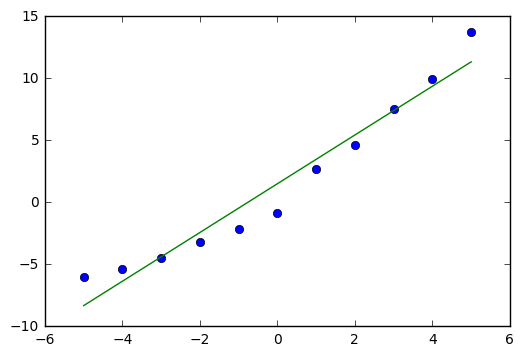

In [124]:
y2fit = p2[0]*x+p2[1]
plt.plot(x,y2,"o")
plt.plot(x,y2fit)

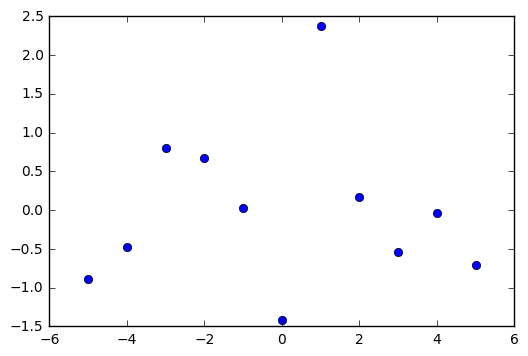

In [125]:
res2 = y2 - yfit
plt.plot(x,res,"o")

In [126]:
p3 = np.polyfit(x,y2,2)
print(p3)


[ 0.15812611  1.96587852 -0.07051043]


In [127]:
fit3 = p3[0]*x**2+p3[1]*x + p3[2]

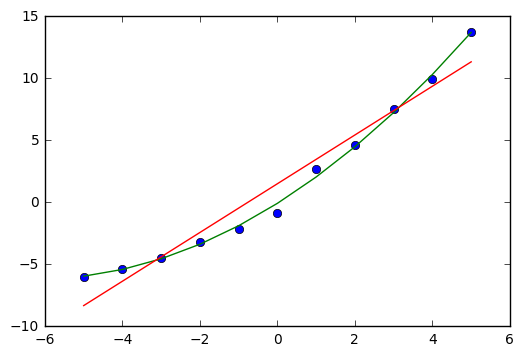

In [128]:
plt.plot(x,y2,"o")
plt.plot(x,fit3)
plt.plot(x,y2fit)

## Chi square distribution

Below we are looking at the distribution of $\chi^2$ for our line fit from above:

In [129]:
chisq_list=[]
for i in range(1000):
    y=2*x+np.random.normal(0,1,11)
    p=np.polyfit(x,y,1)
    res = y-p[0]*x-p[1]
    chisq_list.append(np.sum(res**2))

(array([ 0.00651399,  0.0350127 ,  0.05455467,  0.08061063,  0.1001526 ,
         0.11480907,  0.1001526 ,  0.08061063,  0.05455467,  0.05374042,
         0.04804068,  0.02605596,  0.01709922,  0.01302798,  0.00814249,
         0.00651399,  0.00569974,  0.00325699,  0.00325699,  0.00244275]),
 array([  0.73491263,   1.96303856,   3.19116449,   4.41929042,
          5.64741635,   6.87554228,   8.10366822,   9.33179415,
         10.55992008,  11.78804601,  13.01617194,  14.24429787,
         15.4724238 ,  16.70054974,  17.92867567,  19.1568016 ,
         20.38492753,  21.61305346,  22.84117939,  24.06930532,  25.29743125]),
 <a list of 20 Patch objects>)

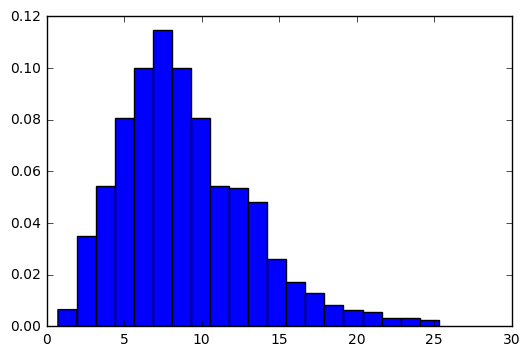

In [130]:
plt.hist(chisq_list,bins=20,normed=True)

In [131]:
chisq_list=np.array(chisq_list)
print(chisq_list.mean())

8.9829143629


It turns out that the mean of $<\chi^{2}>=N-m$, where $N$ is the number of measurements and $m$ is the number of degrees of freedom (number of fitting parameters).  The explanation is that when you look at the definition of $\chi^2$ you should recognize that each term should average to $1$.  I said should because this is not quite correct.  Each parameter is capable of eliminating one of those $1's$ by making the fit go right through this point.  Therefore $N-m$ instead of $N$.

In [132]:
from scipy.stats import chi2

In [133]:
chi = np.linspace(0,50,200)
chi2distr=chi2.pdf(chi,9)

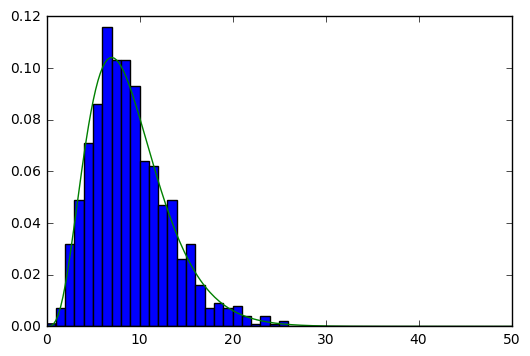

In [134]:
plt.hist(chisq_list,range=(0,50),bins=50,normed=True)
plt.plot(chi,chi2distr)

In [135]:
# if the model and the data are in conflict the chi^2 distribution if not what you would expect
chisq_list=[]
for i in range(1000):
    y=2*x+0.1*x**2+np.random.normal(0,1,11)
    p=np.polyfit(x,y,1)
    res = y-p[0]*x-p[1]
    chisq_list.append(np.sum(res**2))

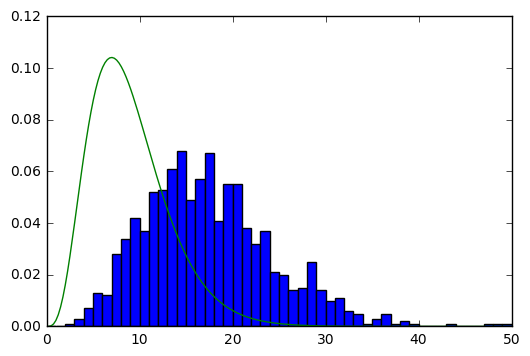

In [136]:
plt.hist(chisq_list,range=(0,50),bins=50,normed=True)
plt.plot(chi,chi2distr)

In [137]:
# using the correct model makes the chi^2 distribution fit the experimental finding
chisq_list=[]
for i in range(1000):
    y=2*x+0.1*x**2+np.random.normal(0,1,11)
    p=np.polyfit(x,y,2)
    res = y-p[0]*x**2-p[1]*x-p[2]
    chisq_list.append(np.sum(res**2))

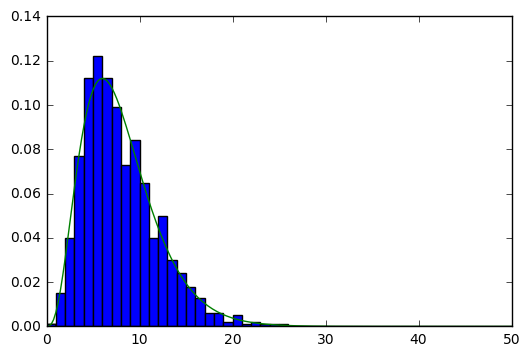

In [139]:
chi2distr=chi2.pdf(chi,8)
plt.hist(chisq_list,range=(0,50),bins=50,normed=True)
plt.plot(chi,chi2distr)